# Process
In this notebook, I will analyse the results of the recommendation on the properties.

# A. Import Libraries

In [113]:
import warnings
import pickle as pkl
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
import numpy as np
pd.set_option("display.precision", 6)
from cornac.metrics import MAE, MSE, RMSE, Precision, Recall, NDCG, AUC, MAP, FMeasure, MRR
from collections import defaultdict
from scipy import stats
from collections import Counter
import seaborn as sns
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# B. Set Hyperparameters

In [2]:
item_threshold = 5 # remove users with less than item_threshold items
user_threshold = 5 # remove items with less than user_threshold users
top_threshold = 200 # remove users who have rated more than top_threshold items
recommendation_type = "books" # books, music or movies
item_col = "book" # the item column
my_seed = 0 # random_seed
top_fraction_items = 0.2 # the limit for an item to be considered popular
top_fraction_users = 0.2# the limit for a user to be considered High Mainstriminess
split_gender_by = "male_female_difference" 
split_country_by = "ratio_USA"
split_by = "pop_fraq"

rd.seed(my_seed)
np.random.seed(my_seed)

These additions will be useful so we can load and save the different files (plots and processed data) with clarity on the hyperparameters.

In [3]:
addition_1 = "_u"+str(item_threshold)+"_i"+str(user_threshold)+"_t"+str(top_threshold)
addition_2 = addition_1 + "_tfi"+str(int(100*top_fraction_items))
addition_3 = addition_2 + "_tfu"+str(int(100*top_fraction_users))
addition_4 = addition_3 + ("_sbpf" if (split_by=="pop_fraq") else "_sbpif")

addition_gender = addition_1 + "_tfu"+str(int(100*top_fraction_users)) + "_mfd"
addition_country = addition_1 + "_tfu"+str(int(100*top_fraction_users)) + "_USAr"

# C. Read Files
Files to read:
1. exp_results & exp_metrics: the Cornac results & metrics
2. training_ids: the user training ids
3. male, female and diverse oriented users
4. low, mid and USA oriented users

In [4]:
raw_file_location = "data/raw/" # here are stored the raw data files
processed_file_location = "data/processed/" # here we store the processed data files

### C1. General results

In [5]:
# Cornac results
with open(processed_file_location+recommendation_type+"/experiment_results_cornac"+addition_4+"10_new.pkl", "rb") as f:
    exp_results = pkl.load(f)
with open(processed_file_location+recommendation_type+"/experiment_metrics_cornac"+addition_4+"10_new.pkl", "rb") as f:
    exp_metrics = pkl.load(f)

In [6]:
with open(processed_file_location+recommendation_type+"/training_user_ids"+addition_4+"_cornac10_new.pkl", "rb") as f:
    training_ids = pkl.load(f)

### C2. Gender analysis results

In [7]:
with open(processed_file_location+recommendation_type+"/new_male_oriented_10_new.csv", "rb") as f:
    male_oriented_users = pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_female_oriented_10_new.csv", "rb") as f:
    female_oriented_users =  pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_diverse_10_new.csv", "rb") as f:
    diverse_users =  pd.read_csv(f,  index_col=0)

### C3. Country analysis results

In [8]:
with open(processed_file_location+recommendation_type+"/new_USA_oriented_10_new.csv", "rb") as f:
    USA_oriented_users = pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_midUSA_10_new.csv", "rb") as f:
    midUSA_oriented_users =  pd.read_csv(f, index_col=0)
with open(processed_file_location+recommendation_type+"/new_lowUSA_oriented_10_new.csv", "rb") as f:
    lowUSA_oriented_users =  pd.read_csv(f,  index_col=0)

## D. Analyze Results

In [9]:
algo_names = ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']

## D.1 Gender

### D.1.1 Total results

In [10]:
full_dataset_gender = pd.concat([female_oriented_users, diverse_users, male_oriented_users])

In [11]:
old_avg_gender = full_dataset_gender.male_female_difference.mean()
new_avg_gender = []

for alg in algo_names:
    new_avg_gender.append(full_dataset_gender["new_male_female_difference_"+alg].mean())

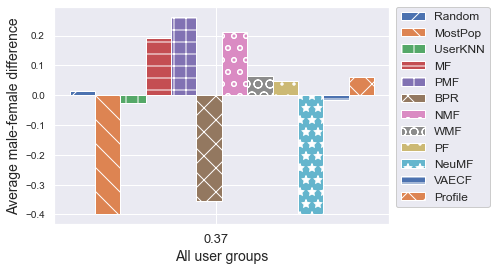

In [12]:
sns.set(rc = {'figure.figsize':(8,4)})

# set width of bar
barWidth = 0.07

# set height of bar
bars1 = [new_avg_gender[0]]
bars2 = [new_avg_gender[1]]
bars3 = [new_avg_gender[2]]
bars4 = [new_avg_gender[3]]
bars5 = [new_avg_gender[4]]
bars6 = [new_avg_gender[5]]
bars7 = [new_avg_gender[6]]
bars8 = [new_avg_gender[7]]
bars9 = [new_avg_gender[8]]
bars10 = [new_avg_gender[9]]
bars11 = [new_avg_gender[10]]
bars12 = old_avg_gender

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
r12 = [x + barWidth for x in r11]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--", "\/"]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random', hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label='MostPop', hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label='UserKNN', hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label='MF', hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label='PMF', hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label='BPR', hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label='NMF', hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label='WMF', hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label='PF', hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label='NeuMF', hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label='VAECF', hatch=patterns[10])
plt.bar(r12, bars12, width=barWidth, label='Profile', hatch=patterns[11])

# Add xticks on the middle of the group bars + show legend
plt.xlabel('All user groups', fontsize='14')
plt.ylabel('Average male-female difference', fontsize='14')
plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], fontsize='13')
plt.yticks(fontsize='10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='12')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')

#### D.1.1.a Results per user

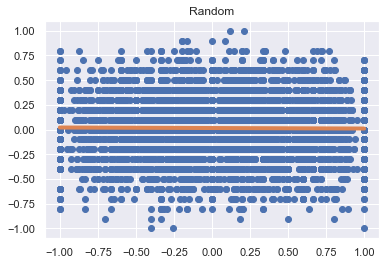

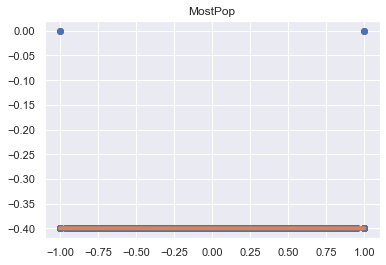

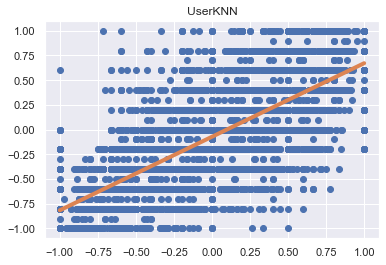

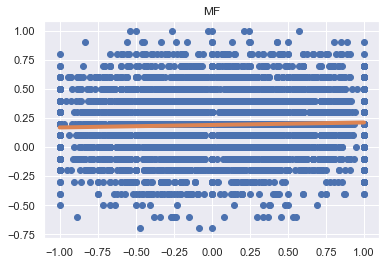

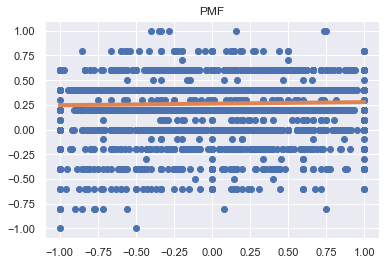

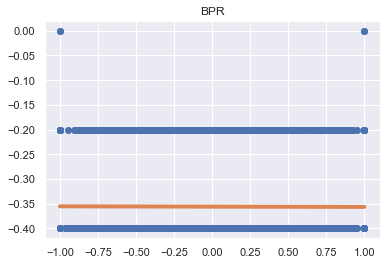

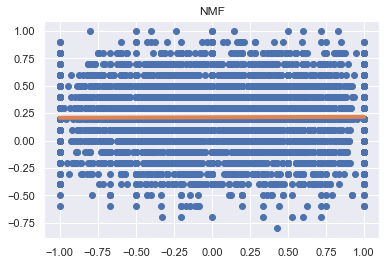

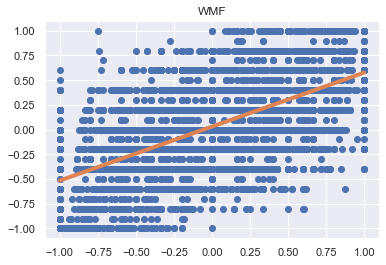

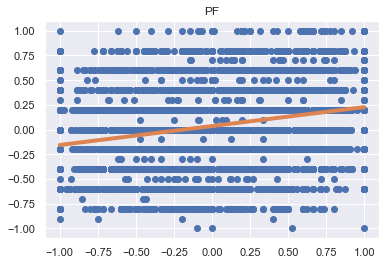

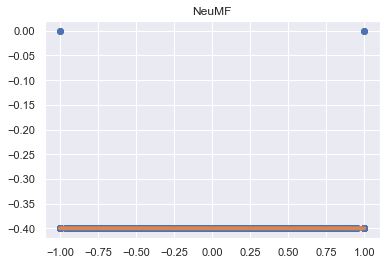

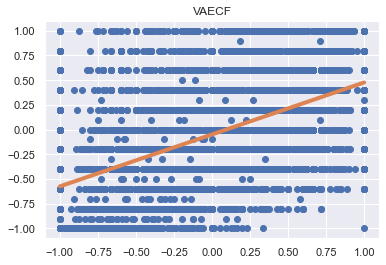

In [13]:
values_before = full_dataset_gender.male_female_difference.values
for alg in algo_names:
    values_after = full_dataset_gender["new_male_female_difference_"+alg].values
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(values_before, values_after)
    line = slope * np.array(values_before) + intercept
    plt.plot(values_before, values_after, 'o', values_before, line, linewidth = 4, label = r_value)
    plt.title(alg)
    plt.show()

### D.1.2 Results per user group

In [14]:
old_avg_male_oriented = male_oriented_users.male_female_difference.mean()
old_avg_female_oriented = female_oriented_users.male_female_difference.mean()
old_avg_diverse = diverse_users.male_female_difference.mean()

new_avg_male_oriented = []
new_avg_female_oriented = []
new_avg_diverse = []
for alg in algo_names:
    male_oriented_users["new_male_female_difference_"+alg] = (male_oriented_users["new_male_female_difference_"+alg] - male_oriented_users.male_female_difference)
    diverse_users["new_male_female_difference_"+alg] = (diverse_users["new_male_female_difference_"+alg] - diverse_users.male_female_difference)                       
    female_oriented_users["new_male_female_difference_"+alg] = (female_oriented_users["new_male_female_difference_"+alg] - female_oriented_users.male_female_difference)    
    
    new_avg_male_oriented.append(male_oriented_users["new_male_female_difference_"+alg].mean())
    new_avg_female_oriented.append(female_oriented_users["new_male_female_difference_"+alg].mean())
    new_avg_diverse.append(diverse_users["new_male_female_difference_"+alg].mean())

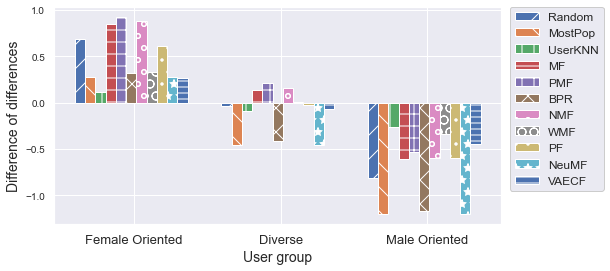

In [15]:
sns.set(rc = {'figure.figsize':(8,4)})

# set width of bar
barWidth = 0.07

# set height of bar
bars1 = [new_avg_female_oriented[0], new_avg_diverse[0], new_avg_male_oriented[0]]
bars2 = [new_avg_female_oriented[1], new_avg_diverse[1], new_avg_male_oriented[1]]
bars3 = [new_avg_female_oriented[2], new_avg_diverse[2], new_avg_male_oriented[2]]
bars4 = [new_avg_female_oriented[3], new_avg_diverse[3], new_avg_male_oriented[3]]
bars5 = [new_avg_female_oriented[4], new_avg_diverse[4], new_avg_male_oriented[4]]
bars6 = [new_avg_female_oriented[5], new_avg_diverse[5], new_avg_male_oriented[5]]
bars7 = [new_avg_female_oriented[6], new_avg_diverse[6], new_avg_male_oriented[6]]
bars8 = [new_avg_female_oriented[7], new_avg_diverse[7], new_avg_male_oriented[7]]
bars9 = [new_avg_female_oriented[8], new_avg_diverse[8], new_avg_male_oriented[8]]
bars10 = [new_avg_female_oriented[9], new_avg_diverse[9], new_avg_male_oriented[9]]
bars11 = [new_avg_female_oriented[10], new_avg_diverse[10], new_avg_male_oriented[10]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
# r12 = [x + barWidth for x in r11]
# r13 = [x + barWidth for x in r12]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--"]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random', hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label='MostPop', hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label='UserKNN', hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label='MF', hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label='PMF', hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label='BPR', hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label='NMF', hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label='WMF', hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label='PF', hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label='NeuMF', hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label='VAECF', hatch=patterns[10])

# Add xticks on the middle of the group bars + show legend
plt.xlabel('User group', fontsize='14')
plt.ylabel('Difference of differences', fontsize='14')
plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], ['Female Oriented', 'Diverse', 'Male Oriented'], fontsize='13')
plt.yticks(fontsize='10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='12')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')

### D1.3 Different user groups and metrics

In [16]:
# print("User groups evaluation is started ...")

# niche_users = list()
# divers_users = list()
# focused_users = list()

# metric_group_results = defaultdict(list)
# metric_group_results['MAE'] = list()
# metric_group_results['Precision@10'] = list()
# metric_group_results['Recall@10'] = list()
# metric_group_results['NDCG@10'] = list()

# ttest_group_results = defaultdict(list)
# ttest_group_results['MAE'] = list()
# ttest_group_results['Precision@10'] = list()
# ttest_group_results['Recall@10'] = list()
# ttest_group_results['NDCG@10'] = list()

# for eachresult in exp_results:
#     print("> " + eachresult.model_name)
#     user_results = eachresult.metric_user_results # <- this is a dictionary
#     for metric in exp_metrics:
#         for user_idx, user_performance in user_results[metric.name].items():
#             user_id = int(training_ids[user_idx])
#             if user_id in female_oriented_users.index:
#                 niche_users.append(user_performance)
#             elif user_id in diverse_users.index:
#                 divers_users.append(user_performance)
#             elif user_id in male_oriented_users.index:
#                 focused_users.append(user_performance)
#             else:
#                 print("Oops! We could not find a user!")

#         print(metric.name + ": " + str(round(np.mean(niche_users), 4)) + "," + str(round(np.mean(divers_users), 4)) + "," + str(round(np.mean(focused_users), 4)))
#         if metric.name in metric_group_results.keys():
#             metric_group_results[metric.name].append((round(np.mean(niche_users), 4),
#                                                 round(np.mean(divers_users), 4),
#                                                 round(np.mean(focused_users), 4)))
      
#             ttest_group_results[metric.name].append((round(stats.ttest_ind(niche_users, divers_users)[1], 8),
#                                                round(stats.ttest_ind(niche_users, focused_users)[1], 8),
#                                               round(stats.ttest_ind(divers_users, focused_users)[1], 8)))

#         print(stats.ttest_ind(niche_users, focused_users))
#         print(len(niche_users)+len(divers_users)+len(focused_users))
#         niche_users.clear()
#         divers_users.clear()
#         focused_users.clear()
#     print()

In [17]:
# sns.set(rc = {'figure.figsize':(6,2)})

# for metric in ['MAE', 'Precision@10', 'Recall@10', 'NDCG@10']:
#     data = [[], [], []]
#     labels = [['', '', '', '', '', '', '', '', ''], [], []]

#     for item in metric_group_results[metric]:
#         # print(item)
#         data[0].append(item[0])
#         data[1].append(item[1])
#         data[2].append(item[2])


#     for item in ttest_group_results[metric]:
#         if item[0] < 0.005:
#             labels[1].append('*')
#         else:
#             labels[1].append('')
#         if item[1] < 0.005 and item[2] < 0.005:
#             labels[2].append('**')
#         else:
#             labels[2].append('')

#     fig, ax = plt.subplots()
#     ax.set_title(metric)
#     ax = sns.heatmap(data, annot=labels, fmt = '', cmap="Blues")
#     ax.set_xticklabels(['MostPop', 'BPR', 'MF', 'PFM', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF'])
#     ax.set_yticklabels(['Female Oriented', 'Diverse', 'Male Oriented'])
#     ax.tick_params(axis='x', rotation=280)
#     ax.tick_params(axis='y', rotation=0)
#     #plt.savefig(f'{metric}_metric_analysis.pdf', dpi=300, bbox_inches='tight')

## D.2 Country

### D.2.1 Total results

In [10]:
full_dataset_country = pd.concat([USA_oriented_users, lowUSA_oriented_users, midUSA_oriented_users])

In [11]:
old_avg_country = full_dataset_country.ratio_USA.mean()
new_avg_country = []

for alg in algo_names:
    new_avg_country.append(full_dataset_country["new_ratio_USA_"+alg].mean())

In [56]:
dict_avg = {}
for i in range(len(algo_names)):
    dict_avg[algo_names[i]] = new_avg_country[i]

In [57]:
dict_avg = sorted(dict_avg.items(), key=lambda x: x[1], reverse=True)

In [58]:
dict_avg

[('VAECF', 0.8115989927604693),
 ('BPR', 0.8023764557759806),
 ('MostPop', 0.7994963802330196),
 ('NeuMF', 0.7994963802330196),
 ('UserKNN', 0.7977022348127177),
 ('PF', 0.7674850487881693),
 ('WMF', 0.7506137865911245),
 ('Random', 0.685568146049729),
 ('PMF', 0.6599150141642727),
 ('MF', 0.602549575070806),
 ('NMF', 0.5679571923197895)]

In [59]:
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [64]:
new_l = dict_avg.copy()
print([x[0] for x in new_l])
for i in range(2,10,1):
    new_l = swapPositions(new_l, i, i+1)
    print([x[0] for x in new_l])
    
for i in range(6,10,1):
    new_l = swapPositions(new_l, i, i+1)
    print([x[0] for x in new_l])

['VAECF', 'BPR', 'MostPop', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'Random', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'MostPop', 'UserKNN', 'PF', 'WMF', 'Random', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'MostPop', 'PF', 'WMF', 'Random', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'MostPop', 'WMF', 'Random', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'MostPop', 'Random', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'Random', 'MostPop', 'PMF', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'Random', 'PMF', 'MostPop', 'MF', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'Random', 'PMF', 'MF', 'MostPop', 'NMF']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'Random', 'PMF', 'MF', 'NMF', 'MostPop']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'PMF', 'Random', 'MF', 'NMF', 'MostPop']
['VAECF', 'BPR', 'NeuMF', 'UserKNN', 'PF', 'WMF', 'PMF', 'MF', 'Random', 'NMF', 'MostPop']

In [66]:
dict_avg = new_l

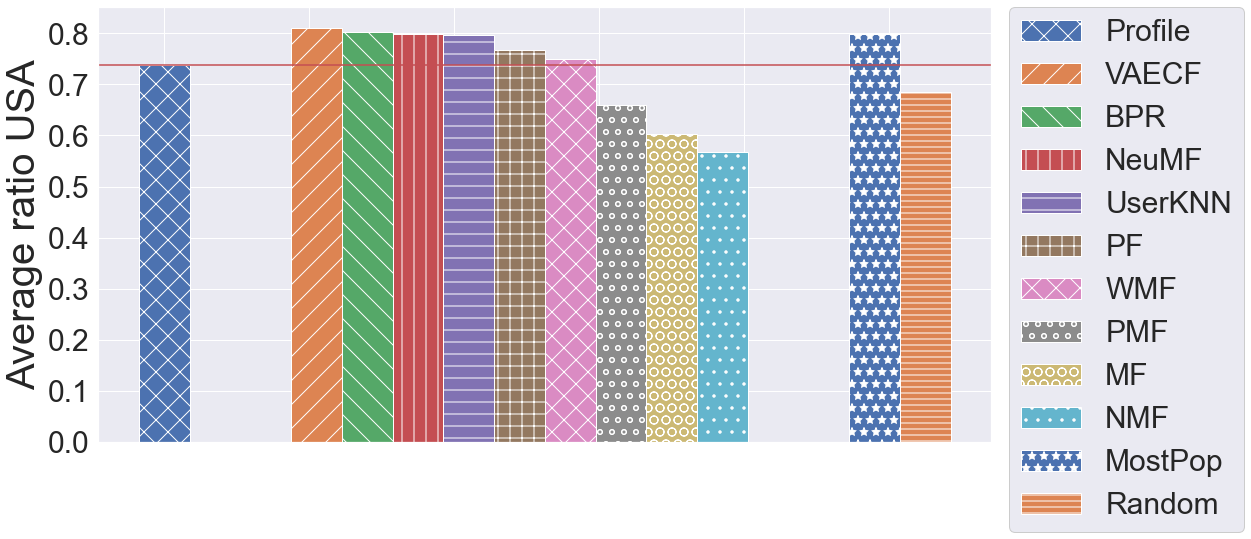

In [138]:
sns.set(rc = {'figure.figsize':(16,8)})

# set width of bar
barWidth = 0.07

# set height of bar
bars12 = old_avg_country
bars1 = [dict_avg[0][1]]
bars2 = [dict_avg[1][1]]
bars3 = [dict_avg[2][1]]
bars4 = [dict_avg[3][1]]
bars5 = [dict_avg[4][1]]
bars6 = [dict_avg[5][1]]
bars7 = [dict_avg[6][1]]
bars8 = [dict_avg[7][1]]
bars9 = [dict_avg[8][1]]
bars10 = [dict_avg[9][1]]
bars11 = [dict_avg[10][1]]


# Set position of bar on X axis
r12 = np.arange(len(bars1))
r1 = [x + 3*barWidth for x in r12]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + 3*barWidth for x in r9]
r11 = [x + barWidth for x in r10]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--", "\/"]

# Make the plot
plt.bar(r12, bars12, width=barWidth, label='Profile', hatch=patterns[11])
plt.bar(r1, bars1, width=barWidth, label=dict_avg[0][0], hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label=dict_avg[1][0], hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label=dict_avg[2][0], hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label=dict_avg[3][0], hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label=dict_avg[4][0], hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label=dict_avg[5][0], hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label=dict_avg[6][0], hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label=dict_avg[7][0], hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label=dict_avg[8][0], hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label=dict_avg[9][0], hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label=dict_avg[10][0], hatch=patterns[10])


# Add xticks on the middle of the group bars + show legend
#plt.xlabel('All user groups', fontsize='30')
plt.ylabel('Average ratio USA', fontsize='40')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], fontsize='30')
plt.axhline(y = bars12, color = 'r', linestyle = '-')
plt.yticks(fontsize='30')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='30')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')

#### D.2.1.a Results per user

In [115]:
values_after

array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8])

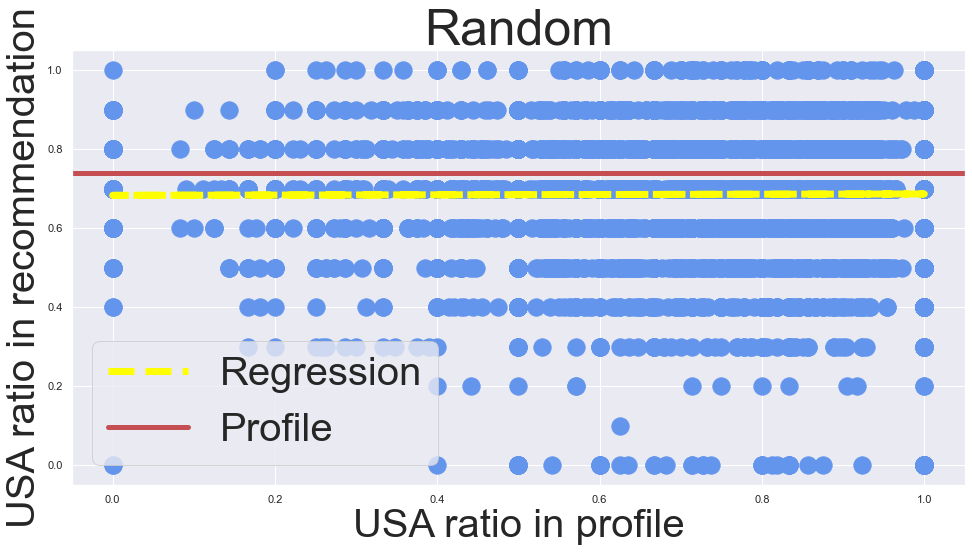

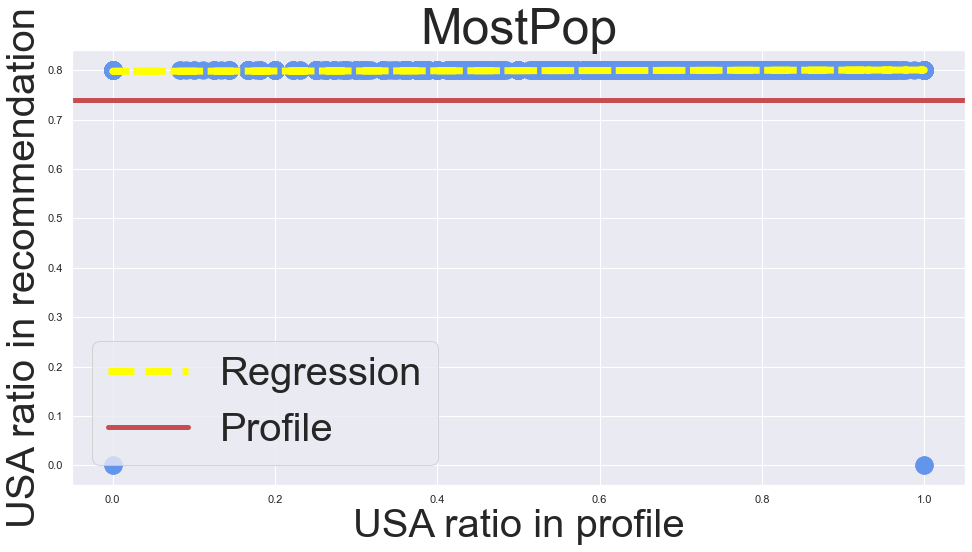

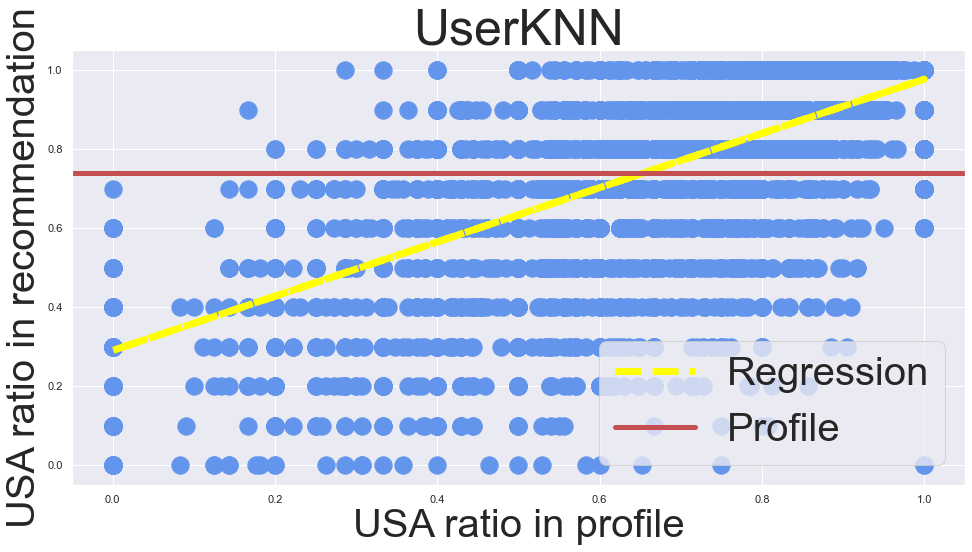

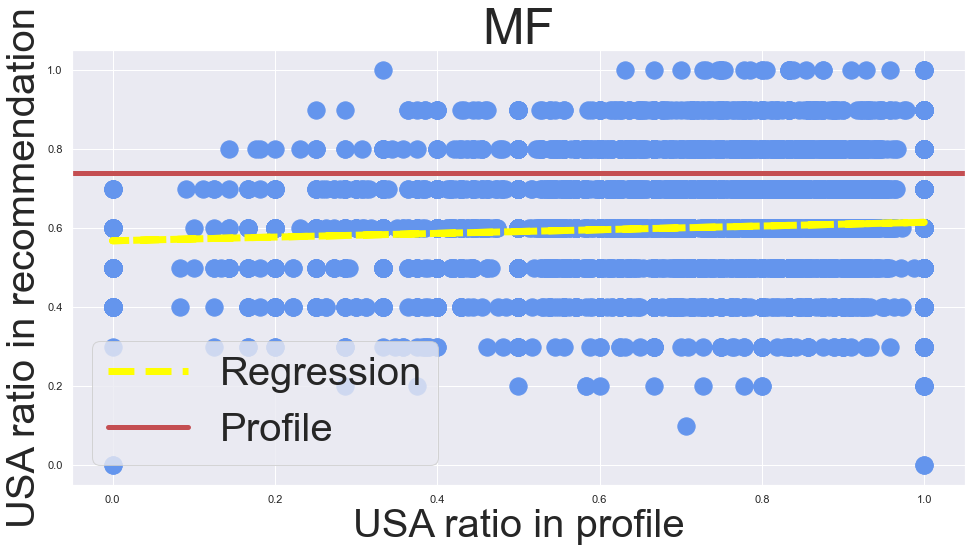

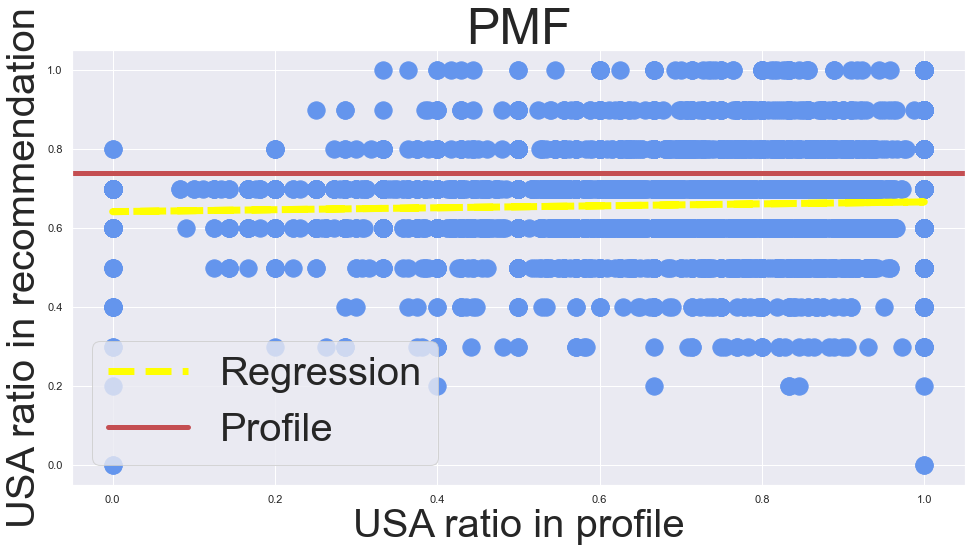

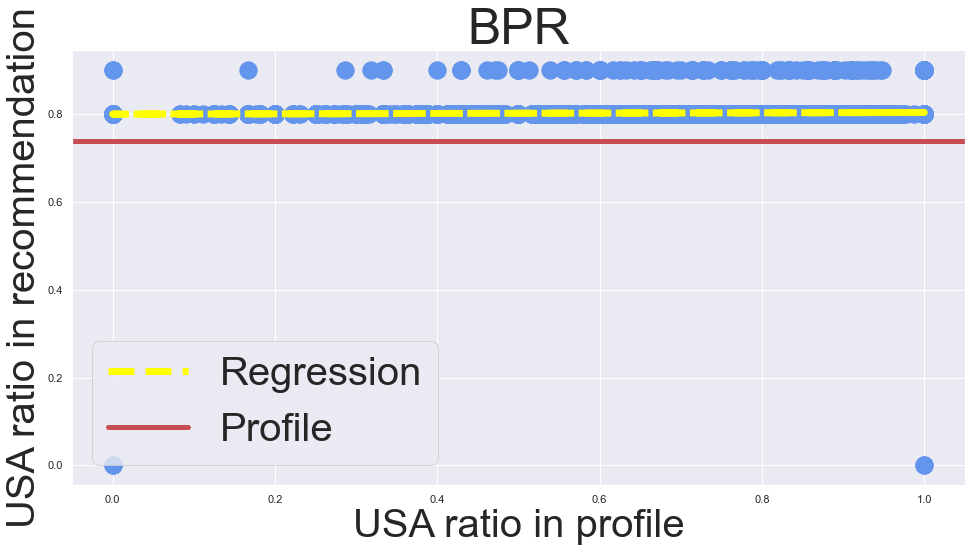

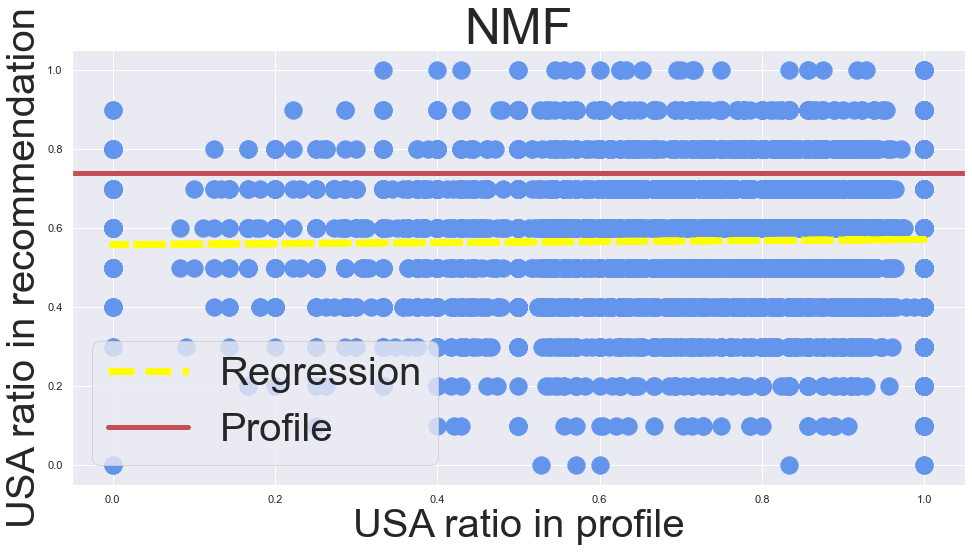

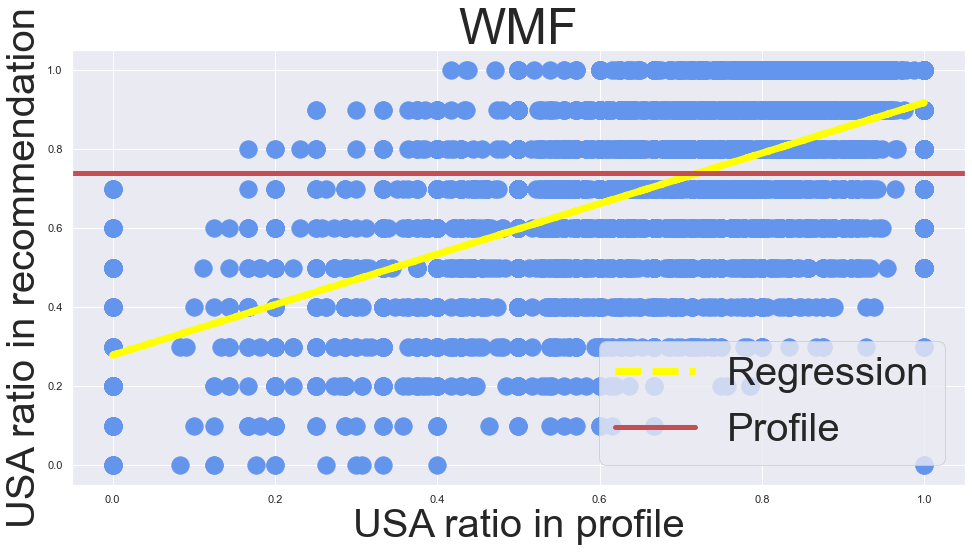

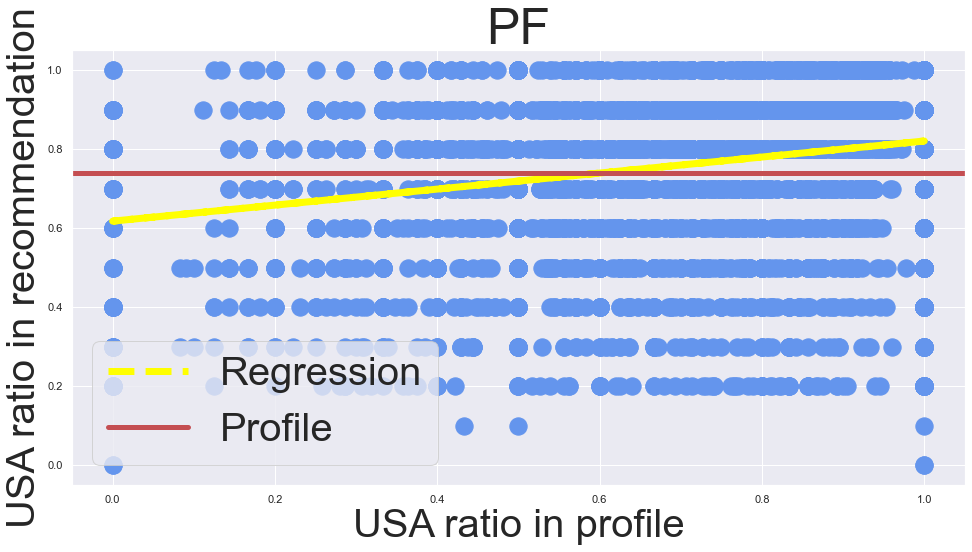

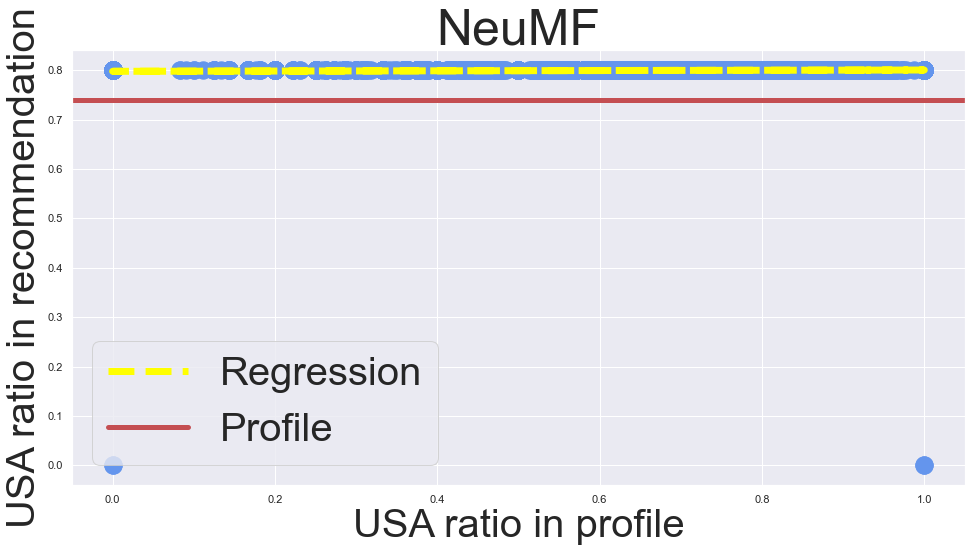

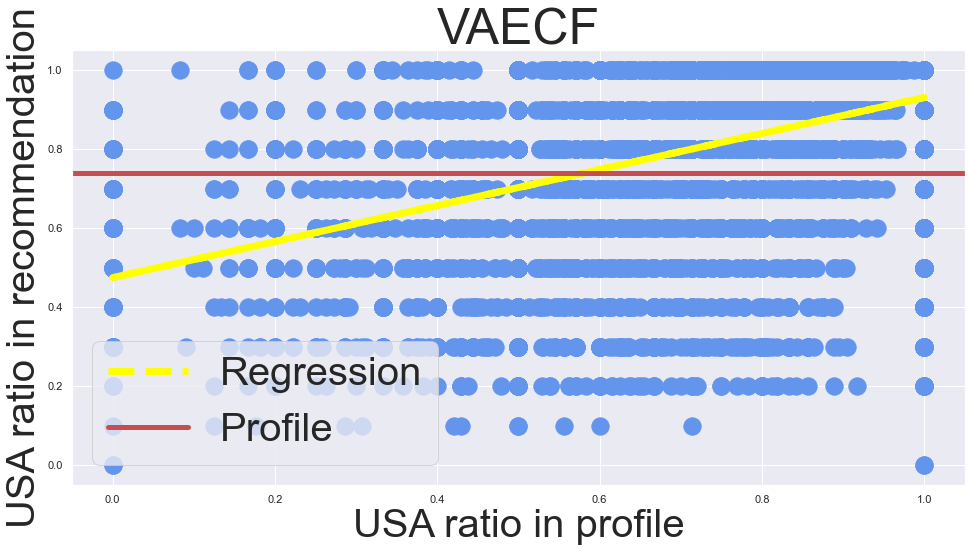

In [145]:
values_before = full_dataset_country.ratio_USA.values
for alg in algo_names:
    values_after = full_dataset_country["new_ratio_USA_"+alg].values
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(values_before, values_after)
    line = slope * np.array(values_before) + intercept
    
    #plt.plot(values_before, values_after, 'o', values_before, line, linewidth = 3)
    plt.scatter(values_before, values_after, s=300, color = "cornflowerblue")
    font = {'size': 40}
    plt.title(alg, fontdict={'size' :50})
    #plt.plot(line)
    plt.plot(values_before, line, label = "Regression", linestyle = '--', 
             color = 'yellow', linewidth=7)

    plt.axhline(y = bars12, color = 'r', linestyle = '-', label = "Profile", linewidth=5)
    plt.xlabel("USA ratio in profile", fontdict=font)
    plt.ylabel("USA ratio in recommendation", fontdict=font)
    plt.legend(prop={ 'size':40})
    plt.show()

### D.2.2 Results per user group

In [24]:
old_avg_USA_oriented = USA_oriented_users.ratio_USA.mean()
old_avg_lowUSA_oriented = lowUSA_oriented_users.ratio_USA.mean()
old_avg_midUSA_oriented = midUSA_oriented_users.ratio_USA.mean()

new_avg_USA_oriented = []
new_avg_lowUSA_oriented = []
new_avg_midUSA_oriented = []
for alg in algo_names:
    USA_oriented_users["new_ratio_USA_"+alg] = (USA_oriented_users["new_ratio_USA_"+alg] - USA_oriented_users.ratio_USA)
    midUSA_oriented_users["new_ratio_USA_"+alg] = (midUSA_oriented_users["new_ratio_USA_"+alg] - midUSA_oriented_users.ratio_USA)
    lowUSA_oriented_users["new_ratio_USA_"+alg] = (lowUSA_oriented_users["new_ratio_USA_"+alg] - lowUSA_oriented_users.ratio_USA)
    
    new_avg_USA_oriented.append(USA_oriented_users["new_ratio_USA_"+alg].mean())
    new_avg_lowUSA_oriented.append(lowUSA_oriented_users["new_ratio_USA_"+alg].mean())
    new_avg_midUSA_oriented.append(midUSA_oriented_users["new_ratio_USA_"+alg].mean())

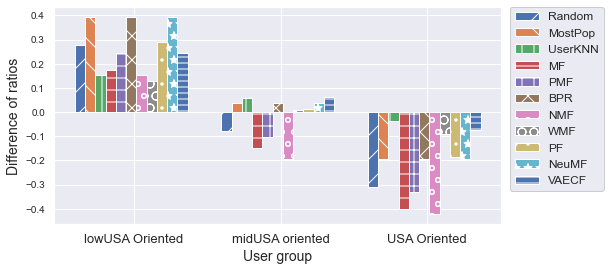

In [25]:
sns.set(rc = {'figure.figsize':(8,4)})

# set width of bar
barWidth = 0.07

# set height of bar
bars1 = [new_avg_lowUSA_oriented[0], new_avg_midUSA_oriented[0], new_avg_USA_oriented[0]]
bars2 = [new_avg_lowUSA_oriented[1], new_avg_midUSA_oriented[1], new_avg_USA_oriented[1]]
bars3 = [new_avg_lowUSA_oriented[2], new_avg_midUSA_oriented[2], new_avg_USA_oriented[2]]
bars4 = [new_avg_lowUSA_oriented[3], new_avg_midUSA_oriented[3], new_avg_USA_oriented[3]]
bars5 = [new_avg_lowUSA_oriented[4], new_avg_midUSA_oriented[4], new_avg_USA_oriented[4]]
bars6 = [new_avg_lowUSA_oriented[5], new_avg_midUSA_oriented[5], new_avg_USA_oriented[5]]
bars7 = [new_avg_lowUSA_oriented[6], new_avg_midUSA_oriented[6], new_avg_USA_oriented[6]]
bars8 = [new_avg_lowUSA_oriented[7], new_avg_midUSA_oriented[7], new_avg_USA_oriented[7]]
bars9 = [new_avg_lowUSA_oriented[8], new_avg_midUSA_oriented[8], new_avg_USA_oriented[8]]
bars10 = [new_avg_lowUSA_oriented[9], new_avg_midUSA_oriented[9], new_avg_USA_oriented[9]]
bars11 = [new_avg_lowUSA_oriented[10], new_avg_midUSA_oriented[10], new_avg_USA_oriented[10]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
# r12 = [x + barWidth for x in r11]
# r13 = [x + barWidth for x in r12]

# ['Random', 'MostPop', 'UserKNN', 'MF', 'PMF', 'BPR', 'NMF', 'WMF', 'PF', 'NeuMF', 'VAECF']
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*", "--"]

# Make the plot
plt.bar(r1, bars1, width=barWidth, label='Random', hatch=patterns[0])
plt.bar(r2, bars2, width=barWidth, label='MostPop', hatch=patterns[1])
plt.bar(r3, bars3, width=barWidth, label='UserKNN', hatch=patterns[2])
plt.bar(r4, bars4, width=barWidth, label='MF', hatch=patterns[3])
plt.bar(r5, bars5, width=barWidth, label='PMF', hatch=patterns[4])
plt.bar(r6, bars6, width=barWidth, label='BPR', hatch=patterns[5])
plt.bar(r7, bars7, width=barWidth, label='NMF', hatch=patterns[6])
plt.bar(r8, bars8, width=barWidth, label='WMF', hatch=patterns[7])
plt.bar(r9, bars9, width=barWidth, label='PF', hatch=patterns[8])
plt.bar(r10, bars10, width=barWidth, label='NeuMF', hatch=patterns[9])
plt.bar(r11, bars11, width=barWidth, label='VAECF', hatch=patterns[10])

# Add xticks on the middle of the group bars + show legend
plt.xlabel('User group', fontsize='14')
plt.ylabel('Difference of ratios', fontsize='14')
plt.xticks([r + barWidth + 0.3 for r in range(len(bars1))], ['lowUSA Oriented', 'midUSA oriented', 'USA Oriented'], fontsize='13')
plt.yticks(fontsize='10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., framealpha=1, fontsize='12')
plt.show()
#plt.savefig('gap_analysis.pdf', dpi=300, bbox_inches='tight')